<a href="https://colab.research.google.com/github/Shrey-12/MachineLearning/blob/main/Rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.shape

(142193, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
# breaking down date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop(columns=['Date'], inplace=True)

In [8]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


In [9]:
df.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [10]:
# filling null values with Mode
mode = ["WindGustDir", "WindDir9am", "WindDir3pm"]
df[mode]=df[mode].fillna(df.mode().iloc[0])

#filling null values with Back fill method
back = ['Cloud9am', 'Cloud3pm', 'RainToday']
df[back]=df[back].fillna(method ='bfill')

# filling null values with Mean
df = df.fillna(df.mean())

<ipython-input-10-496a27de7bff>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [11]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [12]:
col = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
label = LabelEncoder()
for i in col:
    df[i] = label.fit_transform(df[i])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,14,...,8.0,2.0,16.9,21.8,0,0.0,0,2008,12,1
1,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,15,...,7.0,2.0,17.2,24.3,0,0.0,0,2008,12,2
2,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,15,...,7.0,2.0,21.0,23.2,0,0.0,0,2008,12,3
3,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,0,...,7.0,8.0,18.1,26.5,0,1.0,0,2008,12,4
4,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,7,...,7.0,8.0,17.8,29.7,0,0.2,0,2008,12,5


<Axes: >

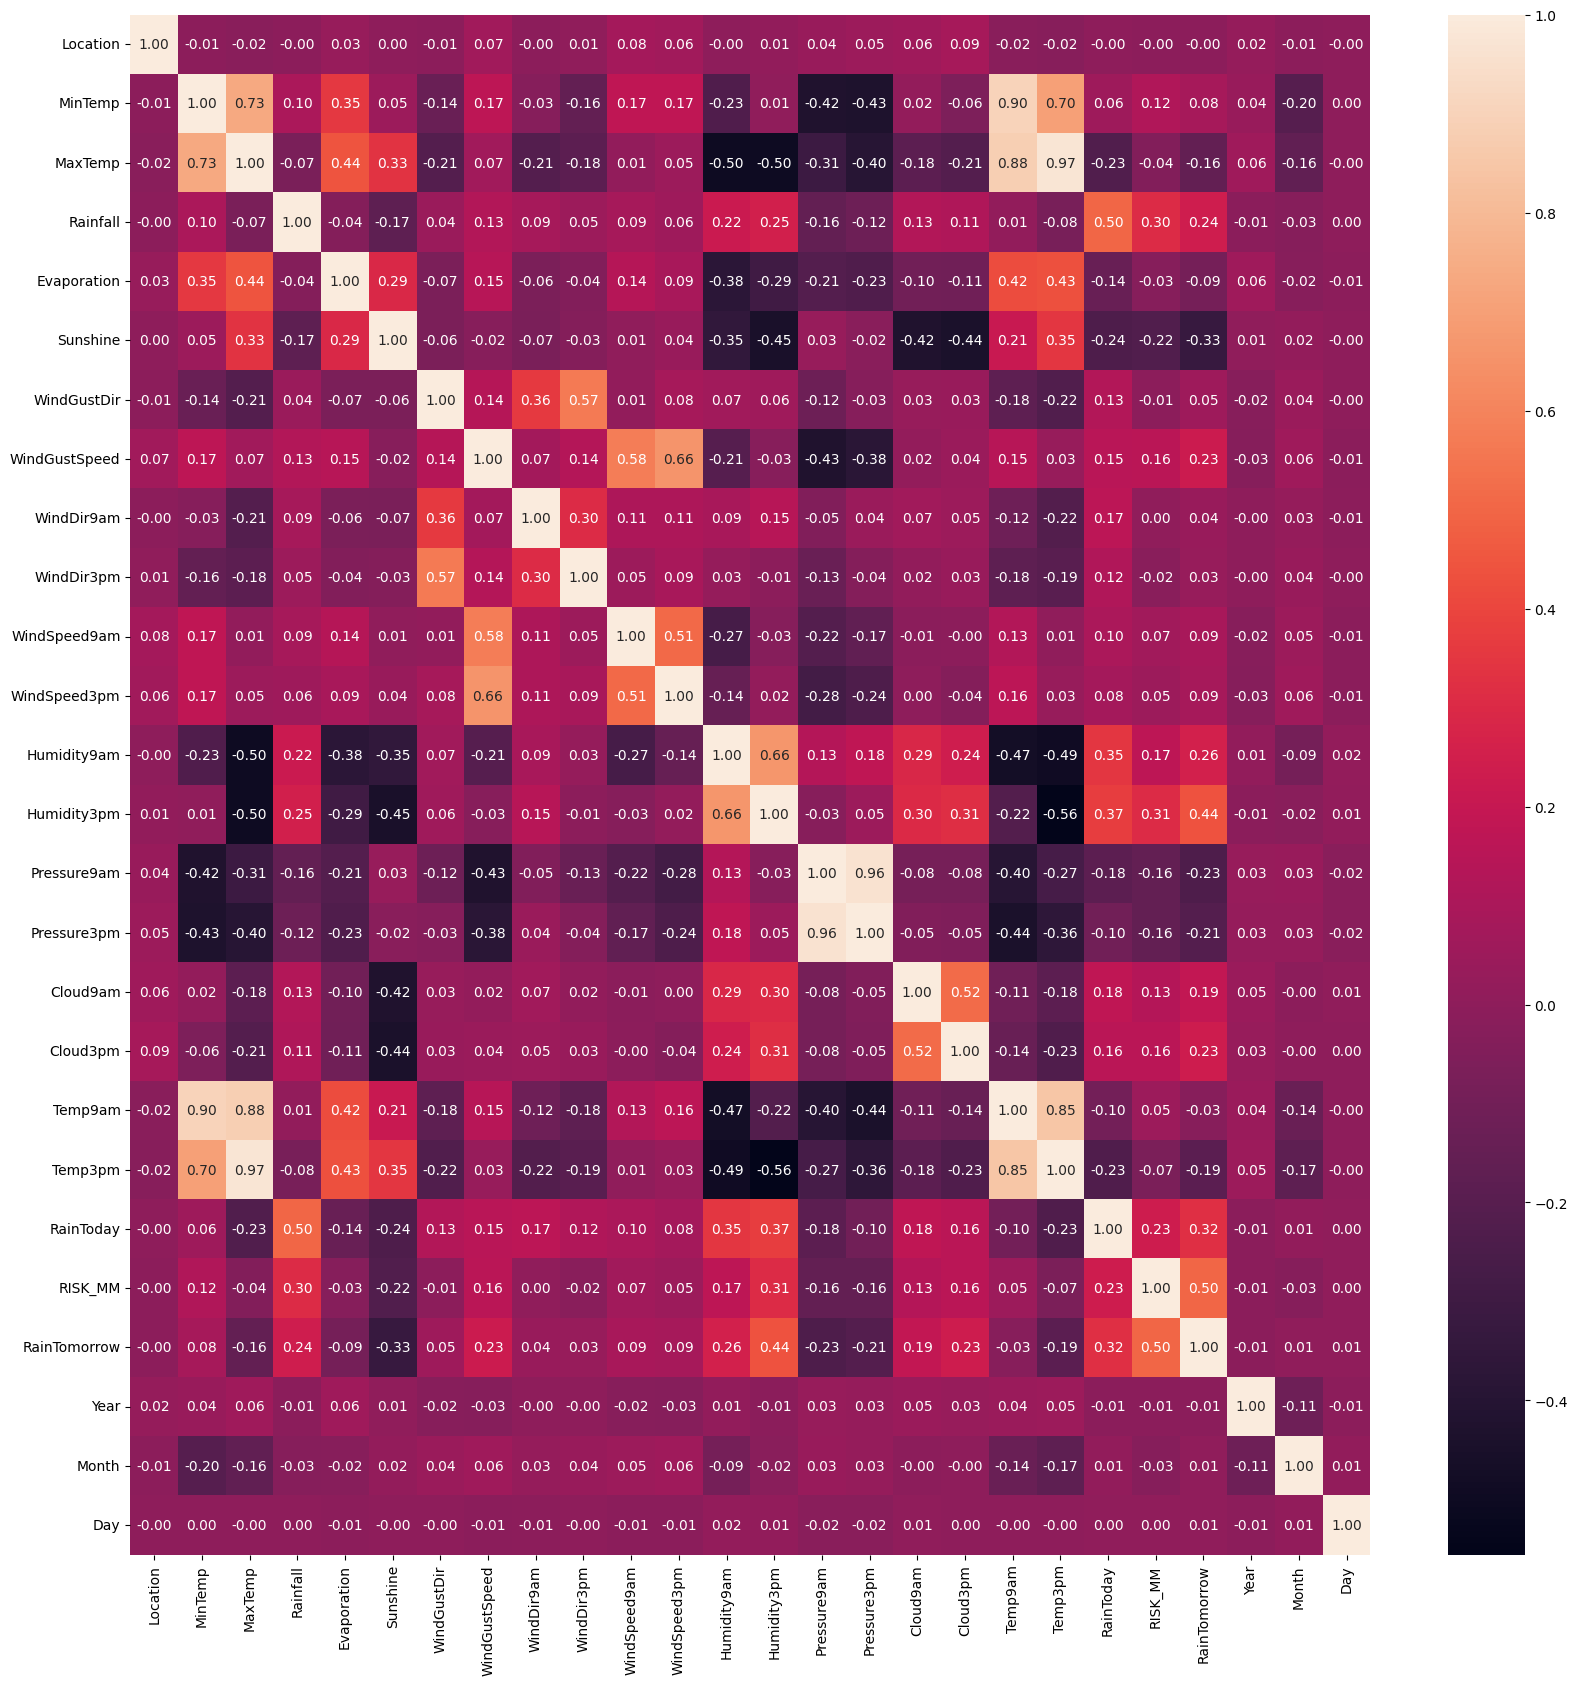

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot= True, fmt='.2f')

In [14]:
X = df.drop(columns = ['RainTomorrow'])
y = df['RainTomorrow']

In [15]:
X.shape

(142193, 25)

In [16]:
y.shape

(142193,)

In [17]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
0,0.041667,0.516509,0.523629,0.001617,0.037723,0.525852,0.866667,0.294574,0.866667,0.933333,...,0.4800,0.888889,0.222222,0.508439,0.522073,0.0,0.000000,0.1,1.0,0.000000
1,0.041667,0.375000,0.565217,0.000000,0.037723,0.525852,0.933333,0.294574,0.400000,1.000000,...,0.4912,0.777778,0.222222,0.514768,0.570058,0.0,0.000000,0.1,1.0,0.033333
2,0.041667,0.504717,0.576560,0.000000,0.037723,0.525852,1.000000,0.310078,0.866667,1.000000,...,0.5056,0.777778,0.222222,0.594937,0.548944,0.0,0.000000,0.1,1.0,0.066667
3,0.041667,0.417453,0.620038,0.000000,0.037723,0.525852,0.266667,0.139535,0.600000,0.000000,...,0.5712,0.777778,0.888889,0.533755,0.612284,0.0,0.002695,0.1,1.0,0.100000
4,0.041667,0.613208,0.701323,0.002695,0.037723,0.525852,0.866667,0.271318,0.066667,0.466667,...,0.4624,0.777778,0.888889,0.527426,0.673704,0.0,0.000539,0.1,1.0,0.133333


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 100)

In [19]:
X_train.shape

(127973, 25)

In [20]:
X_test.shape

(14220, 25)

In [21]:
y_train.shape

(127973,)

In [22]:
y_test.shape

(14220,)

Accuracy Score of the model is: 0.9018987341772152
Confusion matrix is: 
 Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10941
           1       0.93      0.62      0.75      3279

    accuracy                           0.90     14220
   macro avg       0.91      0.80      0.84     14220
weighted avg       0.90      0.90      0.89     14220



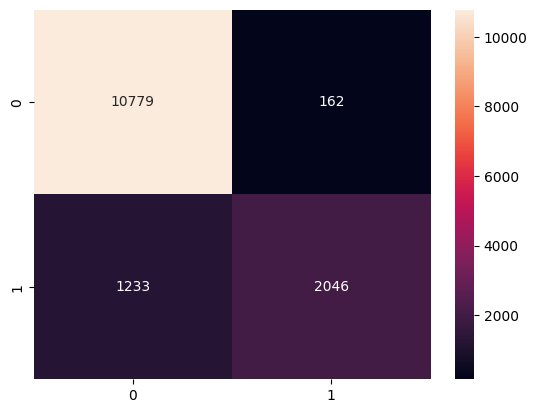

In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(f'Accuracy Score of the model is: {accuracy_score(y_test, y_pred_lr)}')
print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test,y_pred_lr), annot = True, fmt = 'd')}")
print(classification_report(y_test, y_pred_lr))

In [24]:
# from sklearn.svm import SVC
# svm_model = SVC(kernel='linear',C=1.0)
# svm_model.fit(X_train, y_train)
# y_pred_svm = svm_model.predict(X_test)
# print(f'Accuracy Score of the SVM model is: {accuracy_score(y_test, y_pred_svm)}')
# print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d')}")
# print(classification_report(y_test, y_pred_svm))

Accuracy Score of the KNN model is: 0.8274964838255977
Confusion matrix is: 
 Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     10941
           1       0.69      0.46      0.55      3279

    accuracy                           0.83     14220
   macro avg       0.77      0.70      0.72     14220
weighted avg       0.81      0.83      0.81     14220



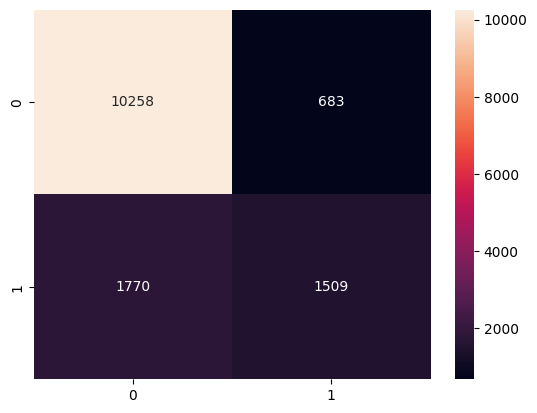

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print(f'Accuracy Score of the KNN model is: {accuracy_score(y_test, y_pred_knn)}')
print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')}")
print(classification_report(y_test, y_pred_knn))

Accuracy Score of the Decision Tree model is: 1.0
Confusion matrix is: 
 Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10941
           1       1.00      1.00      1.00      3279

    accuracy                           1.00     14220
   macro avg       1.00      1.00      1.00     14220
weighted avg       1.00      1.00      1.00     14220



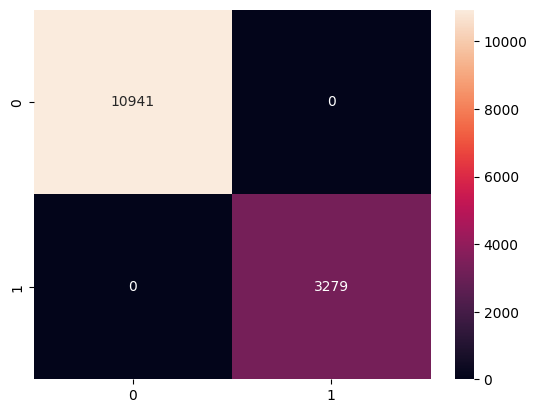

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(f'Accuracy Score of the Decision Tree model is: {accuracy_score(y_test, y_pred_dt)}')
print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')}")
print(classification_report(y_test, y_pred_dt))

Accuracy Score of the Naive Bayes model is: 0.9559774964838256
Confusion matrix is: 
 Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     10941
           1       0.84      1.00      0.91      3279

    accuracy                           0.96     14220
   macro avg       0.92      0.97      0.94     14220
weighted avg       0.96      0.96      0.96     14220



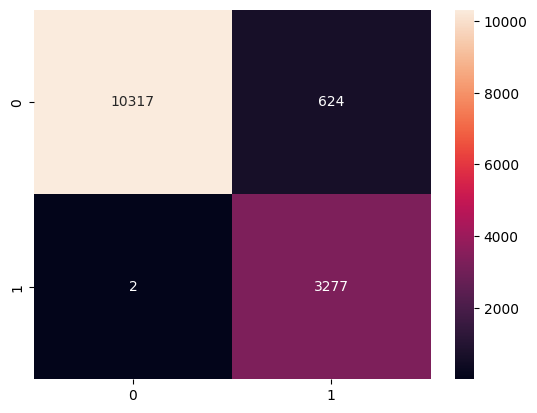

In [27]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print(f'Accuracy Score of the Naive Bayes model is: {accuracy_score(y_test, y_pred_nb)}')
print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d')}")
print(classification_report(y_test, y_pred_nb))

Accuracy Score of the ANN model is: 0.9989451476793249
Confusion matrix is: 
 Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10941
           1       1.00      1.00      1.00      3279

    accuracy                           1.00     14220
   macro avg       1.00      1.00      1.00     14220
weighted avg       1.00      1.00      1.00     14220



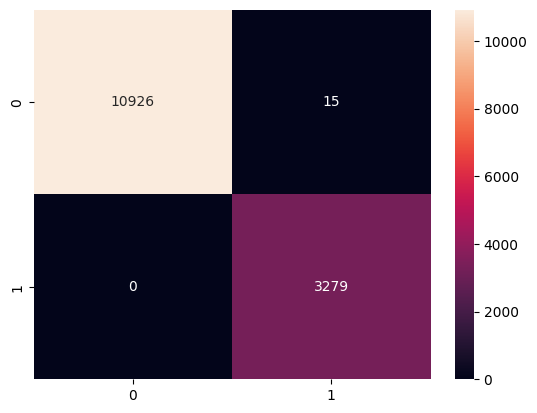

In [28]:
from sklearn.neural_network import MLPClassifier
ann_model = MLPClassifier()
ann_model.fit(X_train, y_train)
y_pred_ann = ann_model.predict(X_test)
print(f'Accuracy Score of the ANN model is: {accuracy_score(y_test, y_pred_ann)}')
print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt='d')}")
print(classification_report(y_test, y_pred_ann))


Accuracy Score of the Random Forest model is: 1.0
Confusion matrix is: 
 Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10941
           1       1.00      1.00      1.00      3279

    accuracy                           1.00     14220
   macro avg       1.00      1.00      1.00     14220
weighted avg       1.00      1.00      1.00     14220



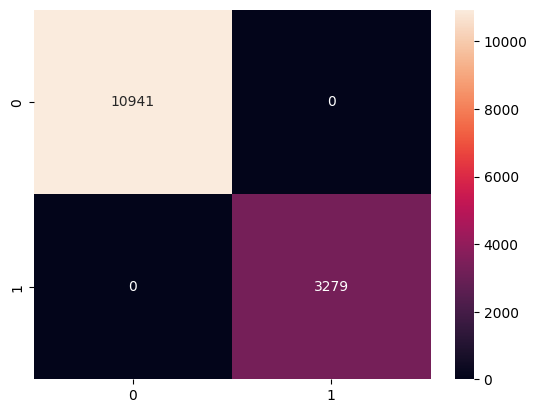

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f'Accuracy Score of the Random Forest model is: {accuracy_score(y_test, y_pred_rf)}')
print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')}")
print(classification_report(y_test, y_pred_rf))

In [33]:
models = [
    ('Logistic Regression', lr_model),
    ('Random Forest Classifier', rf_model),
    ('K-Nearest Neighbors', knn_model),
    ('Decision Tree', dt_model),
    ('Naive Bayes', nb_model),
]

model_names = []
accuracy_scores = []

for model_name, model in models:
    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)*100
    model_names.append(model_name)
    accuracy_scores.append(accuracy)

data = {'Model': model_names, 'Accuracy Scores': accuracy_scores}
result_df = pd.DataFrame(data)
print(result_df)

                      Model  Accuracy Scores
0       Logistic Regression        90.189873
1  Random Forest Classifier       100.000000
2       K-Nearest Neighbors        82.749648
3             Decision Tree       100.000000
4               Naive Bayes        95.597750
